In [226]:
from __future__ import division
import numpy as np

np.random.seed(7)

In [236]:
class LinearRegression():
    def __init__(self, learningRate, num_iterations):
        self.learningRate = learningRate
        self.num_iterations = num_iterations
        
        self.X = None
        self.X_with_ones = None
        self.Y = None
        
        self.m = np.random.random(1)[0]
        self.b = np.random.random(1)[0]
    
    def error(self):
        parameters = np.array([self.m, self.b])
        y_pred = np.dot(self.X_with_ones, parameters)
        return np.divide(
                np.sum(
                    np.square(self.Y - y_pred)
                ), 
                float(self.X.shape[0])
            )
        
    def fit(self, X, Y):
        self.X = X
        X = X.reshape((X.shape[0], 1))
        ones = np.zeros((X.shape[0], 1), dtype='float32') + 1.
        self.X_with_ones = np.append(X, ones, axis=1)
        
        self.Y = Y
        
        self.iterate_gd()
        
        return self.m, self.b, self.error()
    
    def predict(self, X):
        X = X.reshape((X.shape[0], 1))
        ones = np.zeros((X.shape[0], 1), dtype='float32') + 1.
        X = np.append(X, ones, axis=1)
        
        parameters = np.array([self.m, self.b])
        y_pred = np.dot(X, parameters)
        return y_pred
    
    def iterate_gd(self):
        for i in xrange(self.num_iterations):
            parameters = np.array([self.m, self.b])
            print 'Iteration {0}, m = {1}, b = {2}, error = {3}'.format(i,
                                                                       self.m,
                                                                       self.b,
                                                                       self.error())
            
            b_gradient = -(2. * np.divide(
                np.sum(
                    self.Y - np.dot(self.X_with_ones, parameters)
                ),
                self.X.shape[0]
            ))
            
            m_gradient = -(2. * np.divide(
                np.sum(
                    self.X * (self.Y - np.dot(self.X_with_ones, parameters))
                ),
                self.X.shape[0]
            ))
            
            self.m -= self.learningRate * m_gradient
            self.b -= self.learningRate * b_gradient
        
        

In [237]:
model = LinearRegression(learningRate=0.0001,
                        num_iterations=1000)

data = np.genfromtxt('data.csv', delimiter=',')[1:]

In [238]:
data

array([[  53.42680403,   68.77759598],
       [  61.53035803,   62.5623823 ],
       [  47.47563963,   71.54663223],
       [  59.81320787,   87.23092513],
       [  55.14218841,   78.21151827],
       [  52.21179669,   79.64197305],
       [  39.29956669,   59.17148932],
       [  48.10504169,   75.3312423 ],
       [  52.55001444,   71.30087989],
       [  45.41973014,   55.16567715],
       [  54.35163488,   82.47884676],
       [  44.1640495 ,   62.00892325],
       [  58.16847072,   75.39287043],
       [  56.72720806,   81.43619216],
       [  48.95588857,   60.72360244],
       [  44.68719623,   82.89250373],
       [  60.29732685,   97.37989686],
       [  45.61864377,   48.84715332],
       [  38.81681754,   56.87721319],
       [  66.18981661,   83.87856466],
       [  65.41605175,  118.5912173 ],
       [  47.48120861,   57.25181946],
       [  41.57564262,   51.39174408],
       [  51.84518691,   75.38065167],
       [  59.37082201,   74.76556403],
       [  57.31000344,   

In [239]:
X = data[:, 0]
Y = data[:, 1]

In [240]:
model.fit(X, Y)

Iteration 0, m = 0.438409231441, b = 0.723465177831, error = 2763.66674647
Iteration 1, m = 0.954052148536, b = 0.733643047406, error = 770.438985526
Iteration 2, m = 1.21121138622, b = 0.738752734748, error = 274.685995267
Iteration 3, m = 1.33946041278, b = 0.741334833085, error = 151.382937099
Iteration 4, m = 1.40341972261, b = 0.742656379508, error = 120.715130376
Iteration 5, m = 1.43531665629, b = 0.743349266985, error = 113.087440112
Iteration 6, m = 1.45122353718, b = 0.743728631294, error = 111.190256952
Iteration 7, m = 1.45915590656, b = 0.743951636014, error = 110.718357893
Iteration 8, m = 1.4631112513, b = 0.744096661297, error = 110.600953599
Iteration 9, m = 1.46508318615, b = 0.744202796657, error = 110.571718772
Iteration 10, m = 1.46606596073, b = 0.744289536703, error = 110.564413338
Iteration 11, m = 1.46655542425, b = 0.744366603726, error = 110.562562154
Iteration 12, m = 1.46679886516, b = 0.744438846399, error = 110.562067544
Iteration 13, m = 1.4669196104, b 

(1.4657405984757443, 0.81083589916679599, 110.5172869556758)

In [241]:
model.error()

110.5172869556758

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

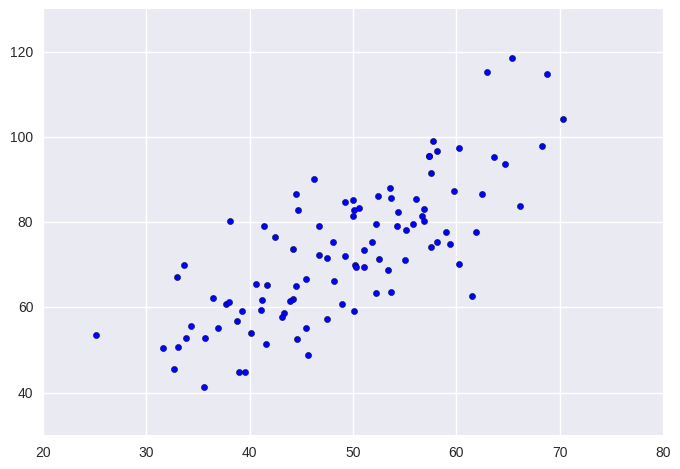

In [243]:
plt.scatter(X, Y)
plt.show()

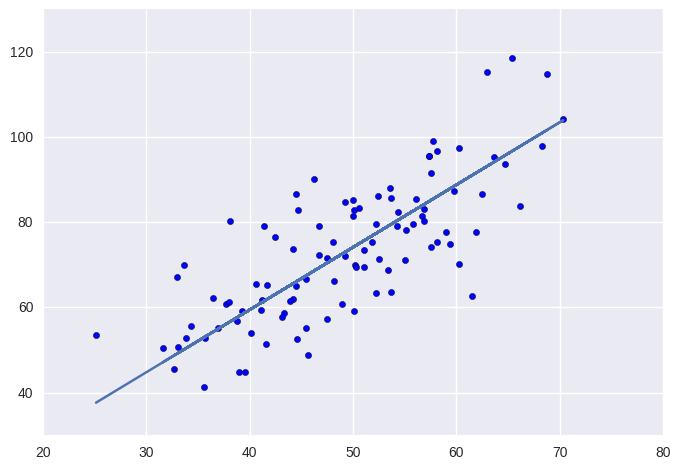

In [244]:
plt.scatter(X, Y)
plt.plot(X, model.predict(X))
plt.show()